### Libraries & Data

In [1093]:
import requests
import pandas as pd
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import sklearn
from ast import literal_eval
from scipy.stats import pearsonr

In [1094]:
data = pd.read_csv('2A_data-output.csv', index_col=0, converters={'production_companies': literal_eval}, parse_dates=['release_date'])

In [1095]:
data.head(6)

,id,release,release_date,opening_revenue,percent_of_total_revenue,opening_theaters,genre_ids,original_language,popularity,vote_average,...,writer,writer_xp_median,writer_xp_sum,writer_rating_median,writer_rating_max,production_room,writers_room,sound_room,crew,based_on_novel
0,59,A History of Violence,2005-09-23,"$364,000",1.20%,14,"[18, 53, 80]",en,23.726,7.2,...,306.0,3.5,7.0,4.7000,5.800,13.0,3.0,18.0,73.0,0.0
1,8976,A Lot Like Love,2005-04-21,"$7,576,593",34.70%,"2,502","[35, 18, 10749]",en,12.853,6.8,...,56459.0,NaN,0.0,NaN,NaN,5.0,1.0,13.0,36.0,0.0
2,10077,A Sound of Thunder,2005-05-15,"$917,398",48.30%,816,"[53, 878, 12, 28]",en,17.001,4.8,...,53297.0,6.0,62.0,5.9565,10.000,31.0,4.0,16.0,133.0,0.0
3,8202,Æon Flux,2005-11-30,"$12,661,112",48.90%,"2,608","[878, 28, 53]",en,22.860,5.6,...,54047.0,4.0,17.0,6.6000,10.000,33.0,3.0,21.0,187.0,0.0
4,22559,Aliens of the Deep,2005-01-28,"$479,368",5.30%,27,[99],en,12.978,6.1,...,1192052.0,7.0,7.0,6.9000,7.900,5.0,1.0,1.0,13.0,0.0
5,12142,Alone in the Dark,2005-01-28,"$2,834,421",54.70%,"2,124","[28, 14, 27]",en,14.815,3.2,...,40607.0,1.0,2.0,4.5355,5.971,24.0,3.0,15.0,143.0,0.0


### Set Index

In [1096]:
data = data.set_index('id')

In [1097]:
data.head(2)

,release,release_date,opening_revenue,percent_of_total_revenue,opening_theaters,genre_ids,original_language,popularity,vote_average,vote_count,...,writer,writer_xp_median,writer_xp_sum,writer_rating_median,writer_rating_max,production_room,writers_room,sound_room,crew,based_on_novel
id,,,,,,,,,,,,,,,,,,,,,
59,A History of Violence,2005-09-23,"$364,000",1.20%,14,"[18, 53, 80]",en,23.726,7.2,3193,...,306.0,3.5,7.0,4.7,5.8,13.0,3.0,18.0,73.0,0.0
8976,A Lot Like Love,2005-04-21,"$7,576,593",34.70%,"2,502","[35, 18, 10749]",en,12.853,6.8,1262,...,56459.0,NaN,0.0,NaN,NaN,5.0,1.0,13.0,36.0,0.0


### Drop Irrelevant & Problematic Observations

#### *Drop Non Feature-Length Films*

In [1098]:
data[data.runtime < 60]

,release,release_date,opening_revenue,percent_of_total_revenue,opening_theaters,genre_ids,original_language,popularity,vote_average,vote_count,...,writer,writer_xp_median,writer_xp_sum,writer_rating_median,writer_rating_max,production_room,writers_room,sound_room,crew,based_on_novel
id,,,,,,,,,,,,,,,,,,,,,
30172,Magnificent Desolation: Walking on the Moon,2005-09-23,"$479,587",1.40%,80,[99],en,9.614,6.2,11,...,1053031.0,8.0,21.0,6.900,7.9,3.0,3.0,2.0,13.0,0.0
800359,Catch and Release,2006-08-27,"$7,658,898",49.30%,"1,622",[18],en,0.177,0.0,0,...,1108691.0,1.5,3.0,1.000,1.0,0.0,2.0,2.0,7.0,0.0
750989,Pride,2006-06-10,"$3,533,300",50.10%,"1,518",[],en,0.608,1.0,1,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0
535650,Release,2006-07-30,Opening,% of Total,Open Th,[],en,0.002,0.0,0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0
18085,Roving Mars,2006-01-27,"$412,337",4.00%,27,[99],en,2.906,7.2,32,...,1053054.0,5.5,11.0,7.092,7.4,5.0,2.0,1.0,11.0,0.0
121506,The Protector,2006-10-15,"$5,034,180",41.80%,"1,541","[18, 28]",en,3.303,7.0,34,...,103331.0,16.0,16.0,4.000,4.5,0.0,1.0,0.0,2.0,0.0
1091125,Venus,2006-01-01,"$35,604",1.10%,3,[53],en,0.871,0.0,0,...,3357137.0,NaN,0.0,NaN,NaN,7.0,1.0,3.0,24.0,0.0
782966,Amazing Grace,2007-01-01,"$4,305,000",-,791,"[18, 36]",en,0.355,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
344451,Bella,2007-10-04,"$1,328,448",16.50%,165,[18],en,0.196,4.0,1,...,NaN,NaN,NaN,NaN,NaN,2.0,0.0,0.0,8.0,0.0


According to the Screen Actors Guild, a feature-length film is defined at a minimum threshold of 60 minutes. Filtering for observations that don't meet this threshold we find mostly short films, as well as more problematic or incorrectly coded features (i.e. feature 535650). We drop these 

In [1099]:
data = data[data.runtime > 60]

In [1100]:
len(data)

515

#### *Identify & Drop Duplicates*

In [1101]:
data.index.nunique()

515

In [1102]:
data.release.nunique()

513

Of 515 remaining observations, it appears we only have 513 unique releases. Upon further evaluation, we find the two culprits:

In [1103]:
data[(data['release'] == 'Beowulf') | (data['release'] == 'The Guardian')]

,release,release_date,opening_revenue,percent_of_total_revenue,opening_theaters,genre_ids,original_language,popularity,vote_average,vote_count,...,writer,writer_xp_median,writer_xp_sum,writer_rating_median,writer_rating_max,production_room,writers_room,sound_room,crew,based_on_novel
id,,,,,,,,,,,,,,,,,,,,,
4643,The Guardian,2006-09-28,"$18,006,064",32.70%,"3,241","[28, 12, 18]",en,26.043,7.100,1502,...,41586.0,2.0,2.0,5.568,5.568,41.0,1.0,25.0,177.0,0.0
642075,The Guardian,2006-09-04,"$18,006,064",32.70%,"3,241",[],en,0.158,0.000,0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0
2310,Beowulf,2007-11-05,"$27,515,871",33.40%,"3,153","[12, 28, 16]",en,42.752,5.898,2790,...,24.0,20.0,84.0,6.400,8.700,12.0,3.0,11.0,94.0,0.0
606386,Beowulf,2007-02-13,"$27,515,871",33.40%,"3,153",[],en,0.608,0.000,0,...,2327860.0,1.0,1.0,0.000,0.000,0.0,1.0,0.0,2.0,0.0


These may have been a simple processing error in compiling the data, or they could have been assigned multiple ID's in the original TMDB dataset. Either way, we'll drop the incorrect observations 

In [1104]:
data = data.drop([642075, 606386])

### Drop Irrelevant & Problematic Features

#### *Drop Additional Identifiers*

In [1105]:
#IMDB identifier to serve as crosswalk
data[['imdb_id', 'release']].head(3)

,imdb_id,release
id,,
59,tt0399146,A History of Violence
8976,tt0391304,A Lot Like Love
10077,tt0318081,A Sound of Thunder


We explored imdb data initially, but determined the TMDB features captured the majority of the information. The imdb features too were packaged in a pretty monster csv, so deemed not worth the effort. We drop this feature.

Release is the name for the id itself. Obviously an important feature, but not to the model itself - dropping for now, and may re-incorporate at a later point for analysis.

In [1106]:
data = data.drop(columns = ['imdb_id', 'release'])

#### *Drop Features Beyond Scope of Observation*

In [1107]:
data[['percent_of_total_revenue', 'revenue', 'opening_theaters']].head(3)

,percent_of_total_revenue,revenue,opening_theaters
id,,,
59,1.20%,60740827,14
8976,34.70%,42886719,"2,502"
10077,48.30%,11700000,816


Provided our study is designed to evaluate revenue in the opening weekend alone, total revenue is not relevant. 
Percent of Total Revenue represents the proportion of total revenue earned in the first weekend - while this is a fascinating feature, it  may be too biased by events / factors following opening weekend (for example, positive / negative reporting influencing folks to go to theaters); it's therefore dropped.

There are a variety of arguments for and against including the number of opening theaters; however, we must ultimately rely on the design of the study itself. Our objective is to explore what drives an audience - the consumer - to the box-office on opening weekend. While one might argue the decision to show a film at a theater requires a similar decision making process, that decision making process is owned by professionals - theaters. While there could be some further influence here between studios and distributors, such a contracts to show a film at a predefined quantity of theaters, we determined it wasn't a strong enough case to include the feature in our study. If time allowed, we may have revisited this decision, or explored incorporating with our target variable (such as a revenue / theaters in opening weekend); but in this exercise, we drop it.

In [1108]:
data = data.drop(columns = ['percent_of_total_revenue', 'revenue', 'opening_theaters'])

In [1109]:
data[['popularity', 'vote_average', 'vote_count']].head(3)

,popularity,vote_average,vote_count
id,,,
59,23.726,7.2,3193
8976,12.853,6.8,1262
10077,17.001,4.8,381


TMDB is a community-built platform, which provides users with "rating" functionality - similar to an imdb or letterboxd service. Provided the timing of these submissions can't be controlled for, and no votes would be recorded prior to opening weekend (at least for the vast majority of movie goers), these too fall outside the scope.

In [1110]:
data = data.drop(columns = ['popularity', 'vote_average', 'vote_count'])

In [1111]:
data[['original_language']].head(3)

,original_language
id,
59,en
8976,en
10077,en


In desiging the study, we decided to include only english-language films. Therefore, there is no additional information in this feature. 

In [1112]:
data = data.drop(columns = 'original_language')

#### *Drop Too Granular Nominal Features*

In [1113]:
data[['writer', 'director']].head(3)

,writer,director
id,,
59,306.0,224.0
8976,56459.0,24248.0
10077,53297.0,37710.0


These floats represent TMDB's "person" codes for individual writers and directors in the database

In [1114]:
data[['writer', 'director']].nunique()

writer      462
director    444
dtype: int64

Upwards of 85%-90% of films with unique writers and directors. It would be very difficult to translate this into a useable nominal feature without exploding the feature space. Instead, we choose to quantify the experience of writers and director in other features - such as 'director_xp', 'director_rating_median', 'writer_xp_median', 'writer_xp_sum', etc. If more time allowed, we may have been able to create a feature like "days since last production", which would have perhaps better captured how many films writers / directors were working on within a given period of time; however, we deemed it outside the scope. We drop these features

In [1115]:
data = data.drop(columns = ['writer', 'director'])

### Handling Numeric Data to Preserve Type

In [1116]:
#Target
data['opening_revenue'] = data['opening_revenue'].replace('[\$,]', '', regex=True).replace('-', 0, regex=False).astype(float)

In [1117]:
#Date
data['release_date'] = pd.to_datetime(data['release_date'], format='%Y-%m-%d')

In [1118]:
#Continuous
data['budget'] = data['budget'].astype(float)
data['runtime'] = data['runtime'].astype(float)
data['previous_film_release'] = data['previous_film_release'].astype(float)
data['previous_film_rating'] = data['previous_film_rating'].astype(float)
data['cast_xp_median'] = data['cast_xp_median'].astype(float)
data['cast_xp_sum'] = data['cast_xp_sum'].astype(float)
data['cast_rating_max'] = data['cast_rating_max'].astype(float)
data['director_xp'] = data['director_xp'].astype(float)
data['director_rating_median'] = data['director_rating_median'].astype(float)
data['director_rating_max'] = data['director_rating_max'].astype(float)
data['writer_xp_median'] = data['writer_xp_median'].astype(float)
data['writer_xp_sum'] = data['writer_xp_sum'].astype(float)
data['writer_rating_median'] = data['writer_rating_median'].astype(float)
data['writer_rating_max'] = data['writer_rating_max'].astype(float)
data['production_room'] = data['production_room'].astype(float)
data['writers_room'] = data['writers_room'].astype(float)
data['sound_room'] = data['sound_room'].astype(float)
data['crew'] = data['crew'].astype(float)

In [1119]:
#Ordinal
data['position_in_series'] = data['position_in_series'].astype(int)

In [1120]:
#Binary
data['based_on_novel'] = data['based_on_novel'].astype(int)

### Handling Nominal Data to Preserve Type

In [1121]:
nominal_features = ['genre_ids', 'genres', 'origin_country', 'production_companies', 'production_countries', 'belongs_to_collection.id', 'belongs_to_collection.name'] 

In [1122]:
data[nominal_features].head(6)

,genre_ids,genres,origin_country,production_companies,production_countries,belongs_to_collection.id,belongs_to_collection.name
id,,,,,,,
59,"[18, 53, 80]","[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",['US'],"[{'id': 12, 'logo_path': '/2ycs64eqV5rqKYHyQK0...","[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...",NaN,NaN
8976,"[35, 18, 10749]","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",['US'],"[{'id': 2977, 'logo_path': None, 'name': 'Kevi...","[{'iso_3166_1': 'US', 'name': 'United States o...",NaN,NaN
10077,"[53, 878, 12, 28]","[{'id': 53, 'name': 'Thriller'}, {'id': 878, '...","['GB', 'US']","[{'id': 1403, 'logo_path': '/pMTQNUhHCwr39CsS7...","[{'iso_3166_1': 'CZ', 'name': 'Czech Republic'...",NaN,NaN
8202,"[878, 28, 53]","[{'id': 878, 'name': 'Science Fiction'}, {'id'...",['US'],"[{'id': 4, 'logo_path': '/gz66EfNoYPqHTYI4q9UE...","[{'iso_3166_1': 'US', 'name': 'United States o...",NaN,NaN
22559,[99],"[{'id': 99, 'name': 'Documentary'}]",['US'],"[{'id': 2, 'logo_path': '/wdrCwmRnLFJhEoH8GSfy...","[{'iso_3166_1': 'US', 'name': 'United States o...",NaN,NaN
12142,"[28, 14, 27]","[{'id': 28, 'name': 'Action'}, {'id': 14, 'nam...",['US'],"[{'id': 1062, 'logo_path': None, 'name': 'Boll...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",149704.0,Alone in the Dark Collection


#### *Genres*

In [1123]:
print(data.genre_ids)

id
59             [18, 53, 80]
8976        [35, 18, 10749]
10077     [53, 878, 12, 28]
8202          [878, 28, 53]
22559                  [99]
                ...        
2001           [18, 80, 53]
15581                  [35]
17202              [35, 18]
11199          [28, 12, 35]
1949     [80, 18, 9648, 53]
Name: genre_ids, Length: 513, dtype: object


In [1124]:
data.genre_ids.nunique()

269

In [1125]:
data.genre_ids[59] == data.genre_ids[2001]

False

In [1126]:
test = data.genre_ids.to_list()
clean = []
for i in test:
    a = eval(i)
    clean.append(a)

In [1127]:
from sklearn.preprocessing import MultiLabelBinarizer
multilabelbinarizer = MultiLabelBinarizer()
multilabel_encoded_results = multilabelbinarizer.fit_transform(clean)
multilabelbinarizer.classes_

array([   12,    14,    16,    18,    27,    28,    35,    36,    37,
          53,    80,    99,   878,  9648, 10402, 10749, 10751, 10752])

In [1128]:
df_multilabel_data = pd.DataFrame(multilabel_encoded_results, columns=multilabelbinarizer.classes_)

In [1129]:
df_multilabel_data

,12,14,16,18,27,28,35,36,37,53,80,99,878,9648,10402,10749,10751,10752
0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0
509,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
510,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
511,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0


In [1130]:
data = data.reset_index()
data = pd.merge(data, df_multilabel_data, left_index = True, right_index = True, how = 'inner')
data = data.drop(columns = ['genre_ids', 10752, 'genres'])
data = data.set_index('id')

In [1131]:
data = data.rename(columns = {12 : 'is_adventure',
                                      14 : 'is_fantasy',
                                      16 : 'is_animation',
                                      18 : 'is_drama',
                                      27 : 'is_horror',
                                      28 : 'is_action',
                                      35 : 'is_comedy',
                                      36 : 'is_history',
                                      37 : 'is_western',
                                      53 : 'is_thriller',
                                      80 : 'is_crime',
                                      99 : 'is_documentary',
                                      878 : 'is_sci_fi',
                                      9648 : 'is_mystery',
                                      10402 : 'is_music',
                                      10749 : 'is_romance',
                                      10751 : 'is_family'})

In [1132]:
genres = ['is_adventure', 'is_fantasy','is_animation','is_drama','is_horror','is_action','is_comedy','is_history','is_western', 'is_thriller','is_crime', 'is_documentary', 'is_sci_fi', 'is_mystery','is_music','is_romance', 'is_family']

In [1133]:
data[genres].sum()

is_adventure       96
is_fantasy         51
is_animation       34
is_drama          241
is_horror          59
is_action         103
is_comedy         224
is_history         26
is_western          5
is_thriller       132
is_crime           87
is_documentary     11
is_sci_fi          39
is_mystery         53
is_music           17
is_romance        107
is_family          88
dtype: int64

In [1134]:
data[genres].sum().sum()

np.int64(1373)

In [1135]:
data['total_genres'] = data['is_adventure'] + data['is_fantasy'] + data['is_animation'] + data['is_drama'] + data['is_horror'] + data['is_action'] + data['is_comedy'] + data['is_history'] + data['is_western'] + data['is_thriller'] + data['is_crime'] + data['is_documentary'] + data['is_sci_fi'] + data['is_mystery'] + data['is_music'] + data['is_romance'] + data['is_family']

In [1136]:
data['total_genres'].describe()

count    513.000000
mean       2.676413
std        1.034828
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        6.000000
Name: total_genres, dtype: float64

In [1137]:
len(data[data['total_genres'] > 1]) / len(data)

0.8713450292397661

In this cleansing exercise, we end up with thirteen different genres, one-hot encoded into their own respective binary columns. As we saw in the original vectorized version of this feature, though, a potential problem arises in the intersection of these genres. 447 observations of the 513 - over 87% - are assigned at least one genre; with the median sitting around three genre assignments. If we were to one-hot encode every unique combination of genres, it would lead to a significant and unruly expansion of our feature space. 

One option is to better encode the unique combinations, and one-hot encode it. Another is to rely on interaction features. We revisit this later in modeling, but end up pursuing 2-genre interaction features: With at least 75% of observations with two genres, these interaction features cover a significant amount of territory without exploding the feature space. Furthermore, it better covers the overlapping of genres between observations. The one-hot encoding of unique combinations would have likely increased the feature space more (up to 269 features, but probably less), while not covering the actual "interactions" which could be fruitful in modeling.

#### *Origin Country*

In [1138]:
data.origin_country.value_counts()

origin_country
['US']                      408
['US', 'GB']                 21
['CA', 'US']                 15
['GB']                       14
['GB', 'US']                 12
['AU', 'US']                  4
['US', 'CA']                  3
['US', 'AU']                  3
['DE', 'GB']                  2
['DE', 'US']                  2
['US', 'MX']                  2
['CA', 'US', 'GB']            2
['FR', 'GB']                  2
['DE', 'US', 'AU']            1
['CA', 'FR']                  1
['IE']                        1
['US', 'SI']                  1
['US', 'FR', 'GB']            1
['US', 'DE']                  1
['DE', 'US', 'FR', 'GB']      1
['CA']                        1
['US', 'NZ']                  1
['CA', 'CN', 'US']            1
['US', 'JP']                  1
['NZ', 'DE', 'US']            1
['CZ', 'US', 'GB']            1
['CA', 'US', 'AU']            1
['US', 'CH']                  1
['MX', 'US']                  1
['GB', 'DE', 'US', 'CZ']      1
['DE', 'FR', 'US']       

In [1139]:
countries = data.origin_country.to_list()
clean_countries = []
for i in countries:
    a = eval(i)
    clean_countries.append(a)

In [1140]:
from sklearn.preprocessing import MultiLabelBinarizer
multilabelbinarizer = MultiLabelBinarizer()
multilabel_encoded_results = multilabelbinarizer.fit_transform(clean_countries)
multilabelbinarizer.classes_

array(['AU', 'CA', 'CH', 'CN', 'CZ', 'DE', 'FR', 'GB', 'IE', 'JP', 'MX',
       'NZ', 'PS', 'SI', 'US'], dtype=object)

In [1141]:
df_multilabel_data = pd.DataFrame(multilabel_encoded_results, columns=multilabelbinarizer.classes_)
df_multilabel_data

,AU,CA,CH,CN,CZ,DE,FR,GB,IE,JP,MX,NZ,PS,SI,US
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
509,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
510,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
511,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [1142]:
data = data.reset_index()
data = pd.merge(data, df_multilabel_data, left_index = True, right_index = True, how = 'inner')
data = data.drop(columns = 'origin_country')
data = data.set_index('id')

In [1143]:
data[['AU', 'CA', 'CH', 'CN', 'CZ', 'DE', 'FR', 'GB', 'IE', 'JP', 'MX',
       'NZ', 'PS', 'SI', 'US']].sum()

AU      9
CA     24
CH      2
CN      1
CZ      3
DE     10
FR      8
GB     59
IE      1
JP      1
MX      3
NZ      4
PS      1
SI      1
US    490
dtype: int64

In an effort to prevent overfitting / underfitting on sparse data, we'll go ahead and leave the top three origin countries (US, GB, CA) alone, and combined the remaining columns into a larger "international" feature

In [1144]:
data['international'] = data['AU'] + data['CH'] + data['CN'] + data['CZ'] + data['DE'] + data['FR'] + data['IE'] + data['JP'] + data['MX'] + data['NZ'] + data['PS'] + data['SI']

In [1145]:
data[['international', 'CA', 'GB', 'US']].sum()

international     44
CA                24
GB                59
US               490
dtype: int64

still skewed, but in significantly lower dimension

In [1146]:
data = data.drop(columns = ['AU', 'CH', 'CN', 'CZ', 'DE', 'FR', 'IE', 'JP', 'MX', 'NZ', 'PS', 'SI'])

#### *Series*

In [1147]:
data[['belongs_to_collection.id', 'belongs_to_collection.name']]

,belongs_to_collection.id,belongs_to_collection.name
id,,
59,NaN,NaN
8976,NaN,NaN
10077,NaN,NaN
8202,NaN,NaN
22559,NaN,NaN
...,...,...
2001,NaN,NaN
15581,NaN,NaN
17202,143588.0,Why Did I Get Married Collection


In [1148]:
data['is_series'] = data['belongs_to_collection.id'].notnull().astype(int)

In [1149]:
data[['is_series', 'belongs_to_collection.id', 'belongs_to_collection.name']]

,is_series,belongs_to_collection.id,belongs_to_collection.name
id,,,
59,0,NaN,NaN
8976,0,NaN,NaN
10077,0,NaN,NaN
8202,0,NaN,NaN
22559,0,NaN,NaN
...,...,...,...
2001,0,NaN,NaN
15581,0,NaN,NaN
17202,1,143588.0,Why Did I Get Married Collection


Both feature simply binary indicators of whether the movie is part of a larger series - we can simply just binarize it here and drop the original two columns

In [1150]:
data = data.drop(columns = ['belongs_to_collection.id', 'belongs_to_collection.name'])

In [1151]:
data[['is_series', 'position_in_series']].head(20)

,is_series,position_in_series
id,,
59,0,1
8976,0,1
10077,0,1
8202,0,1
22559,0,1
12142,1,1
1947,0,1
11637,1,1
8978,0,1


What we have to be careful about here, though, is introducing information that occurs beyond the scope of the experiment.

We created the position_in_series column here to indicate, if a film was a follow-on, where did it fall (ex. sequel, trilogy, etc). For those films that were not parts of series, they were demarcated as "1". 

Now, if the film is a series - like the observation in row 5 - but it falls as the first within the series, we come to a problem. We can assume, broadly speaking for a first film, that the studio wouldn't know if the film would become a series yet. Therefore, marking it down as such introduces information we can't use. 

We should therefore more clearly demarcate these columns

In [1152]:
data['is_series_truth'] = (data.is_series == data.position_in_series).astype(int)

In [1153]:
data['is_series_test'] = data.is_series - data.is_series_truth

In [1154]:
data[['is_series', 'is_series_truth', 'is_series_test', 'position_in_series']].head(30)

,is_series,is_series_truth,is_series_test,position_in_series
id,,,,
59,0,0,0,1
8976,0,0,0,1
10077,0,0,0,1
8202,0,0,0,1
22559,0,0,0,1
12142,1,1,0,1
1947,0,0,0,1
11637,1,1,0,1
8978,0,0,0,1


In [1155]:
data = data.drop(columns = ['is_series', 'is_series_truth'])

In [1156]:
data = data.rename(columns = {'is_series_test' : 'is_series'})

was it a round about way of doing it? absolutely. But it's 10:30 on Saturday, and I had no choice but to move forward with it. Courageous, I think

#### *Production Companies*

In [1157]:
data[['production_companies']]

,production_companies
id,
59,"[{'id': 12, 'logo_path': '/2ycs64eqV5rqKYHyQK0..."
8976,"[{'id': 2977, 'logo_path': None, 'name': 'Kevi..."
10077,"[{'id': 1403, 'logo_path': '/pMTQNUhHCwr39CsS7..."
8202,"[{'id': 4, 'logo_path': '/gz66EfNoYPqHTYI4q9UE..."
22559,"[{'id': 2, 'logo_path': '/wdrCwmRnLFJhEoH8GSfy..."
...,...
2001,"[{'id': 846, 'logo_path': '/1ITLcfP6CoW7fPhJUf..."
15581,"[{'id': 3379, 'logo_path': None, 'name': 'Elev..."
17202,"[{'id': 35, 'logo_path': '/wxrHa3nZ1K4zo65p569..."


In [1158]:
nest = []
for i in data['production_companies'].to_list():
    vals = [list(d.values())[0] for d in i]
    nest.append(vals)

data['production_companies_cln'] = nest
data['num_production_companies'] = data['production_companies_cln'].str.len()

In [1159]:
major_studios = [33,                                # Universal Pictures
                 3436,                              # Universal Studios Home Entertainment Family Productions
                 5556,                              # Universal Animation Studios
                 47046,                             # Universal Pictures do Brazil
                 4,                                 # Paramount Pictures
                 838,                               # Paramount Vantage
                 21834,                             # Paramount Pictures Digital Entertainment
                 220287,                            # Paramount Classics
                 174,                               # Warner Bros. Pictures
                 2785,                              # Warner Bros. Animation
                 17466,                             # Warner Bros. Entertainment Germany
                 12,                                # New Line Cinema
                 2,                                 # Walt Disney Pictures
                 6125,                              # Walt Disney Animation Studios
                 178202,                            # Walt Disney Pictures China
                 25,                                # 20th Century Fox
                 3,                                 # Pixar
                 34,                                # Sony Pictures
                 58,                                # Sony Pictures Classics
                 2251,                              # Sony Pictures Animation
                 5388,                              # Sony Pictures Home Entertainment
                 5,                                 # Columbia Pictures
                 559]

In [1160]:
def num_indie(val):
    vals = [i for i in val if i in major_studios]
    return len(vals)

In [1161]:
data['num_indie'] = data['production_companies_cln'].apply(num_indie)

In [1162]:
data['is_indie'] = data['num_indie'].gt(0).astype(int)
data['pct_indie'] = data['num_indie'] / data['num_production_companies']

In [1163]:
data[['production_companies_cln', 'num_production_companies', 'num_indie', 'is_indie', 'pct_indie']]

,production_companies_cln,num_production_companies,num_indie,is_indie,pct_indie
id,,,,,
59,"[12, 6363, 11508]",3,1,1,0.333333
8976,"[2977, 9195, 2976, 10157]",4,0,0,0.000000
10077,"[1403, 2978, 16850, 2234, 87847, 2755, 2979, 1...",17,1,1,0.058824
8202,"[4, 126, 11533, 746, 6041]",5,1,1,0.200000
22559,"[2, 10221]",2,1,1,0.500000
...,...,...,...,...,...
2001,"[846, 8073, 5, 181992]",4,1,1,0.250000
15581,"[3379, 212245, 4307, 71960, 7405]",5,0,0,0.000000
17202,[35],1,0,0,0.000000


In [1164]:
data = data.drop(columns = ['production_companies', 'production_companies_cln'])

#### *Production Countries*

In [1165]:
data[['production_countries']]

,production_countries
id,
59,"[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is..."
8976,"[{'iso_3166_1': 'US', 'name': 'United States o..."
10077,"[{'iso_3166_1': 'CZ', 'name': 'Czech Republic'..."
8202,"[{'iso_3166_1': 'US', 'name': 'United States o..."
22559,"[{'iso_3166_1': 'US', 'name': 'United States o..."
...,...
2001,"[{'iso_3166_1': 'US', 'name': 'United States o..."
15581,"[{'iso_3166_1': 'US', 'name': 'United States o..."
17202,"[{'iso_3166_1': 'US', 'name': 'United States o..."


In [1166]:
test = data['production_countries'].to_list()[0]

In [1167]:
[list(d.values())[0] for d in literal_eval(test)]

['DE', 'US']

In [1168]:
nest = []
for i in data['production_countries'].to_list():
    vals = [list(d.values())[0] for d in literal_eval(i)]
    nest.append(vals)

In [1169]:
from sklearn.preprocessing import MultiLabelBinarizer
multilabelbinarizer = MultiLabelBinarizer()
multilabel_encoded_results = multilabelbinarizer.fit_transform(nest)
multilabelbinarizer.classes_

array(['AU', 'BG', 'CA', 'CH', 'CN', 'CZ', 'DE', 'DK', 'ES', 'FR', 'GB',
       'HK', 'HU', 'IE', 'IN', 'IS', 'IT', 'JP', 'KR', 'LU', 'MA', 'MX',
       'NL', 'NZ', 'PS', 'RO', 'SK', 'TN', 'TR', 'UA', 'US', 'ZA'],
      dtype=object)

In [1170]:
north_america = ['CA', 'US']
central_america = ['MX']
oceania = ['AU', 'NZ']
europe = ['BG', 'CH', 'CZ', 'DE', 'DK', 'ES', 'FR', 'GB', 'HU', 'IE', 'IS', 'IT', 'LU', 'NL', 'RO', 'SK', 'TR', 'UA', ]
asia = ['CN', 'HK', 'IN', 'JP', 'KR', ]       
mena = ['MA', 'PS', 'TN']
africa = ['ZA']

In [1171]:
data['production_countries_cln'] = nest
data['num_production_companies'] = data['production_countries_cln'].str.len()

In [1172]:
def filmed_in_north_america(val):
    vals = [i for i in val if i in north_america]
    binary = len(vals) > 0
    return binary
    
def filmed_in_central_america(val):
    vals = [i for i in val if i in central_america]
    binary = len(vals) > 0
    return binary
    
def filmed_in_oceania(val):
    vals = [i for i in val if i in oceania]
    binary = len(vals) > 0
    return binary
    
def filmed_in_europe(val):
    vals = [i for i in val if i in europe]
    binary = len(vals) > 0
    return binary
    
def filmed_in_asia(val):
    vals = [i for i in val if i in asia]
    binary = len(vals) > 0
    return binary
    
def filmed_in_mena(val):
    vals = [i for i in val if i in mena]
    binary = len(vals) > 0
    return binary
    
def filmed_in_africa(val):
    vals = [i for i in val if i in africa]
    binary = len(vals) > 0
    return binary

In [1173]:
data['filmed_in_north_america'] = data['production_countries_cln'].apply(filmed_in_north_america).astype(int)
data['filmed_in_central_america'] = data['production_countries_cln'].apply(filmed_in_central_america).astype(int)
data['filmed_in_oceania'] = data['production_countries_cln'].apply(filmed_in_oceania).astype(int)
data['filmed_in_europe'] = data['production_countries_cln'].apply(filmed_in_europe).astype(int)
data['filmed_in_asia'] = data['production_countries_cln'].apply(filmed_in_asia).astype(int)
data['filmed_in_mena'] = data['production_countries_cln'].apply(filmed_in_mena).astype(int)
data['filmed_in_africa'] = data['production_countries_cln'].apply(filmed_in_africa).astype(int)

In [1174]:
data[['filmed_in_europe', 'filmed_in_north_america', 'filmed_in_europe']]

,filmed_in_europe,filmed_in_north_america,filmed_in_europe
id,,,
59,1,1,1
8976,0,1,0
10077,1,1,1
8202,1,1,1
22559,0,1,0
...,...,...,...
2001,0,1,0
15581,0,1,0
17202,0,1,0


In [1175]:
data = data.drop(columns = ['production_countries', 'production_countries_cln'])

#### *Release Date*

<Axes: xlabel='release_date', ylabel='opening_revenue'>

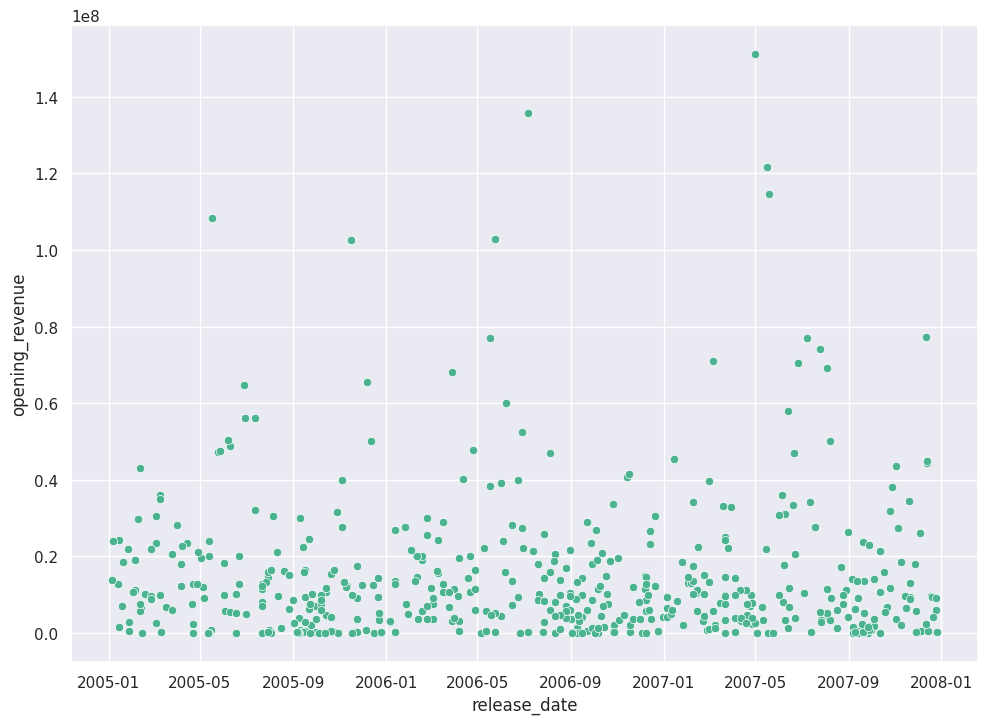

In [1176]:
sns.set_theme(style="ticks")
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})

x = "release_date"
y = "opening_revenue"
data = data

sns.scatterplot(x=x, y=y, data=data,  color="#4CB391")

In [1177]:
data['release_month'] = data.release_date.dt.month

<Axes: xlabel='release_month', ylabel='opening_revenue'>

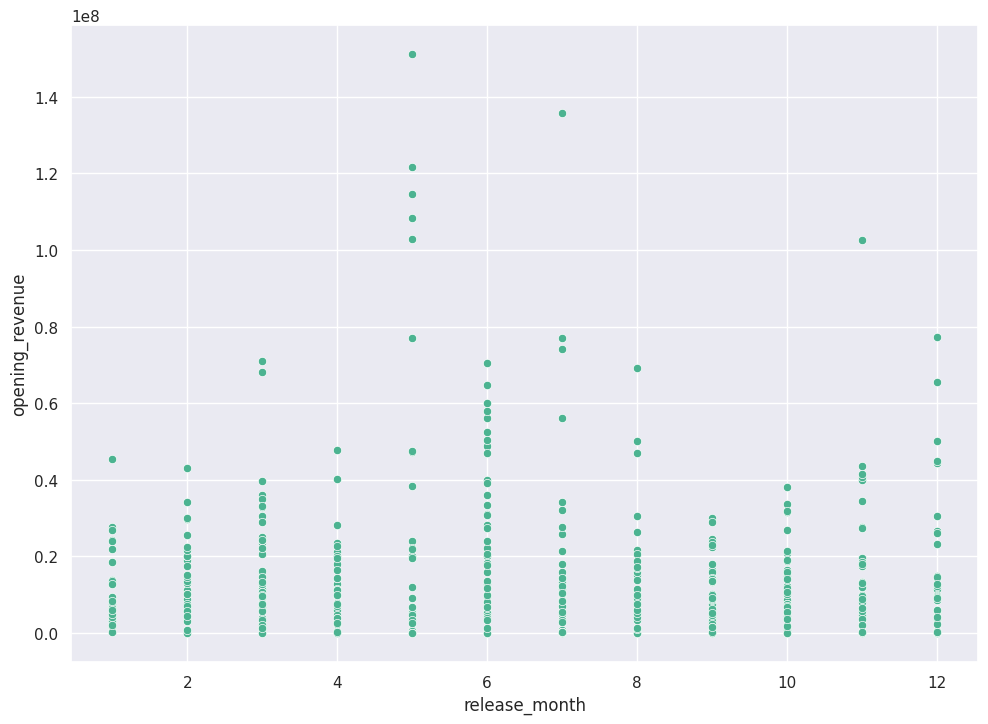

In [1178]:
sns.set_theme(style="ticks")
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})

x = "release_month"
y = "opening_revenue"
data = data

sns.scatterplot(x=x, y=y, data=data,  color="#4CB391")

In [1179]:
#Seasonal
data['is_spring'] = data['release_date'].dt.month.between(3, 4).astype(int)
data['is_summer'] = data['release_date'].dt.month.between(5, 8).astype(int)
data['is_fall'] = data['release_date'].dt.month.between(9, 10).astype(int)
data['is_holiday'] = data['release_date'].dt.month.between(11, 12).astype(int)

In [1180]:
#Months
data = pd.get_dummies(data, columns =['release_month'], dtype=np.int64)

data = data.rename(columns = {'release_month_1' : 'is_jan',
                              'release_month_2' : 'is_feb',
                              'release_month_3' : 'is_mar',
                              'release_month_4' : 'is_apr',
                              'release_month_5' : 'is_may',
                              'release_month_6' : 'is_jun',
                              'release_month_7' : 'is_jul',
                              'release_month_8' : 'is_aug',
                              'release_month_9' : 'is_sep',
                              'release_month_10' : 'is_oct',
                              'release_month_11' : 'is_nov',
                              'release_month_12' : 'is_dec'})

In [1181]:
data = data.drop(columns = 'release_date')

### Handling Missing Values

#### *Target Variable*

In [1182]:
data[data.opening_revenue == 0]

,opening_revenue,budget,runtime,position_in_series,previous_film_release,previous_film_rating,cast_xp_median,cast_xp_sum,cast_rating_max,director_xp,...,is_mar,is_apr,is_may,is_jun,is_jul,is_aug,is_sep,is_oct,is_nov,is_dec
id,,,,,,,,,,,,,,,,,,,,,
10982,0.0,8000000.0,81.0,1,0.0,0.0,32.0,212.0,10.0,8.0,...,0,0,0,0,0,0,0,0,0,1
9912,0.0,25000000.0,127.0,1,0.0,0.0,63.0,252.0,9.0,29.0,...,0,0,0,0,0,0,0,1,0,0


Confirmed with Box Office Mojo source that these films were recorded with null revenue statistics. Provided the limitation of the problem, and the amount of data, we'll choose to remove these nulls rather than try and estimate / imput

In [1183]:
data = data[data.opening_revenue > 0]

#### *Features* | *Null*

In [1184]:
pd.DataFrame(data.isna().sum()).sort_values(by = 0, ascending = False).head(10)

,0
writer_rating_max,57
writer_xp_median,57
writer_rating_median,57
director_rating_max,23
director_rating_median,23
cast_xp_median,3
cast_rating_max,3
pct_indie,3
writer_xp_sum,3
filmed_in_mena,0


Null features related to rating and experience are confirmed against the base API, and indicate the film as the first for cast & crew. We'll confirm these nulls are consistent across all features; impute with 0 to preserve the feature, and build a binary variable to indicate first-timers

In [1185]:
data[['writer_rating_max', 'writer_rating_max', 'writer_xp_median', 'writer_xp_sum']][data.writer_xp_median.isna()].head(5)

,writer_rating_max,writer_rating_max,writer_xp_median,writer_xp_sum
id,,,,
8976,NaN,NaN,NaN,0.0
398,NaN,NaN,NaN,0.0
10060,NaN,NaN,NaN,0.0
501,NaN,NaN,NaN,NaN
8488,NaN,NaN,NaN,0.0


In [1186]:
data.writer_rating_max = data.writer_rating_max.fillna(0)
data.writer_rating_median = data.writer_rating_median.fillna(0)
data.writer_xp_median = data.writer_xp_median.fillna(0)
data.writer_xp_sum = data.writer_xp_sum.fillna(0)

data['first_time_writers'] = data.writer_xp_median.eq(0).astype(int)

In [1187]:
data[['director_rating_median', 'director_rating_max', 'director_xp']][data.director_rating_median.isna()].head(5)

,director_rating_median,director_rating_max,director_xp
id,,,
11453,NaN,NaN,0.0
10066,NaN,NaN,0.0
14358,NaN,NaN,0.0
14278,NaN,NaN,0.0
15258,NaN,NaN,0.0


In [1188]:
data.director_rating_median = data.director_rating_median.fillna(0)
data.director_rating_max = data.director_rating_max.fillna(0)

data['first_time_directors'] = data.director_rating_max.eq(0).astype(int)

In [1189]:
data[['cast_xp_median', 'cast_xp_sum', 'cast_rating_max']][data.cast_xp_median.isna()]

,cast_xp_median,cast_xp_sum,cast_rating_max
id,,,
14358,NaN,0.0,NaN
14278,NaN,0.0,NaN
2287,NaN,0.0,NaN


In [1190]:
data.cast_xp_median = data.cast_xp_median.fillna(0)
data.cast_rating_max = data.cast_rating_max.fillna(0)

In [1191]:
data[['num_production_companies', 'num_indie', 'is_indie', 'pct_indie']][data.pct_indie.isna()]

,num_production_companies,num_indie,is_indie,pct_indie
id,,,,
10773,1,0,0,NaN
14278,1,0,0,NaN
14631,1,0,0,NaN


In [1192]:
data['num_indie'] = data['pct_indie'].isna().astype(int)
data['is_indie'] = data['pct_indie'].isna().astype(int)
data['pct_indie'] = data['pct_indie'].fillna(1)

##### *Features* | *Erroneous 0*

In [1193]:
data[data.budget == 0].head(5)

,opening_revenue,budget,runtime,position_in_series,previous_film_release,previous_film_rating,cast_xp_median,cast_xp_sum,cast_rating_max,director_xp,...,is_may,is_jun,is_jul,is_aug,is_sep,is_oct,is_nov,is_dec,first_time_writers,first_time_directors
id,,,,,,,,,,,,,,,,,,,,,
22559,479368.0,0.0,95.0,1,0.0,0.0,2.0,27.0,8.4,45.0,...,0,0,0,0,0,0,0,0,0,0
13020,76639.0,0.0,110.0,1,0.0,0.0,59.5,119.0,10.0,27.0,...,0,0,0,0,0,0,0,0,0,0
501,269131.0,0.0,103.0,1,0.0,0.0,1.0,1.0,0.0,133.0,...,0,0,1,0,0,0,0,0,1,0
11931,10017575.0,0.0,130.0,1,0.0,0.0,32.0,195.0,10.0,25.0,...,0,0,0,0,0,1,0,0,0,0
10033,9275000.0,0.0,94.0,1,0.0,0.0,12.0,84.0,9.0,8.0,...,0,0,0,0,0,0,1,0,0,0


In [1194]:
len(data[data.budget == 0])

47

In [1195]:
def fill_budget(val):
    if val == 0:
        return data.budget.median()
    else:
        return val

In [1196]:
data.budget = data.budget.apply(fill_budget)

In [1197]:
len(data[data.budget == 0])

0

In [1198]:
print(len(data[data.runtime == 0]))
print(len(data[data.crew == 0]))
print(len(data[data.production_room == 0]))
print(len(data[data.writers_room == 0]))
print(len(data[data.sound_room == 0]))

0
0
7
3
7


In [1199]:
def fill_production_room(val):
    if val == 0:
        return data.production_room.median()
    else:
        return val

def fill_writers_room(val):
    if val == 0:
        return data.writers_room.median()
    else:
        return val

def fill_sound_room(val):
    if val == 0:
        return data.sound_room.median()
    else:
        return val

In [1200]:
data.production_room = data.production_room.apply(fill_production_room)
data.writers_room = data.writers_room.apply(fill_writers_room)
data.sound_room = data.sound_room.apply(fill_sound_room)

In [1201]:
print(len(data[data.runtime == 0]))
print(len(data[data.crew == 0]))
print(len(data[data.production_room == 0]))
print(len(data[data.writers_room == 0]))
print(len(data[data.sound_room == 0]))

0
0
0
0
0


In [1202]:
data

,opening_revenue,budget,runtime,position_in_series,previous_film_release,previous_film_rating,cast_xp_median,cast_xp_sum,cast_rating_max,director_xp,...,is_may,is_jun,is_jul,is_aug,is_sep,is_oct,is_nov,is_dec,first_time_writers,first_time_directors
id,,,,,,,,,,,,,,,,,,,,,
59,364000.0,32000000.0,96.0,1,0.0,0.0,43.0,177.0,8.500,102.0,...,0,0,0,0,1,0,0,0,0,0
8976,7576593.0,30000000.0,107.0,1,0.0,0.0,12.0,71.0,7.574,3.0,...,0,0,0,0,0,0,0,0,1,0
10077,917398.0,80000000.0,101.0,1,0.0,0.0,21.0,114.0,10.000,45.0,...,1,0,0,0,0,0,0,0,0,0
8202,12661112.0,62000000.0,93.0,1,0.0,0.0,23.0,130.0,10.000,2.0,...,0,0,0,0,0,0,1,0,0,0
22559,479368.0,26000000.0,95.0,1,0.0,0.0,2.0,27.0,8.400,45.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001,10826287.0,21000000.0,118.0,1,0.0,0.0,25.0,182.0,10.000,5.0,...,0,0,0,0,0,1,0,0,0,0
15581,2756661.0,7000000.0,93.0,1,0.0,0.0,4.0,56.0,10.000,10.0,...,0,0,1,0,0,0,0,0,0,0
17202,21353789.0,15000000.0,113.0,1,0.0,0.0,11.0,75.0,10.000,29.0,...,0,0,0,0,0,1,0,0,0,0


In [1203]:
data.columns

Index(['opening_revenue', 'budget', 'runtime', 'position_in_series',
       'previous_film_release', 'previous_film_rating', 'cast_xp_median',
       'cast_xp_sum', 'cast_rating_max', 'director_xp',
       'director_rating_median', 'director_rating_max', 'writer_xp_median',
       'writer_xp_sum', 'writer_rating_median', 'writer_rating_max',
       'production_room', 'writers_room', 'sound_room', 'crew',
       'based_on_novel', 'is_adventure', 'is_fantasy', 'is_animation',
       'is_drama', 'is_horror', 'is_action', 'is_comedy', 'is_history',
       'is_western', 'is_thriller', 'is_crime', 'is_documentary', 'is_sci_fi',
       'is_mystery', 'is_music', 'is_romance', 'is_family', 'total_genres',
       'CA', 'GB', 'US', 'international', 'is_series',
       'num_production_companies', 'num_indie', 'is_indie', 'pct_indie',
       'filmed_in_north_america', 'filmed_in_central_america',
       'filmed_in_oceania', 'filmed_in_europe', 'filmed_in_asia',
       'filmed_in_mena', 'filmed_in_a

In [1204]:
target_continuous = ['opening_revenue', 'budget', 'runtime', 'position_in_series',
       'previous_film_release', 'previous_film_rating', 'cast_xp_median',
       'cast_xp_sum', 'cast_rating_max', 'director_xp',
       'director_rating_median', 'director_rating_max', 'writer_xp_median',
       'writer_xp_sum', 'writer_rating_median', 'writer_rating_max',
       'production_room', 'writers_room', 'sound_room', 'crew', 'total_genres',
       'num_production_companies', 'num_indie', 'pct_indie']

target_nominal = ['opening_revenue',
       'based_on_novel', 'is_adventure', 'is_fantasy', 'is_animation',
       'is_drama', 'is_horror', 'is_action', 'is_comedy', 'is_history',
       'is_western', 'is_thriller', 'is_crime', 'is_documentary', 'is_sci_fi',
       'is_mystery', 'is_music', 'is_romance', 'is_family',
       'CA', 'GB', 'US', 'international', 'is_series','is_indie',
       'filmed_in_north_america', 'filmed_in_central_america',
       'filmed_in_oceania', 'filmed_in_europe', 'filmed_in_asia',
       'filmed_in_mena', 'filmed_in_africa', 'is_spring', 'is_summer',
       'is_fall', 'is_holiday', 'is_jan', 'is_feb', 'is_mar', 'is_apr',
       'is_may', 'is_jun', 'is_jul', 'is_aug', 'is_sep', 'is_oct', 'is_nov',
       'is_dec', 'first_time_writers', 'first_time_directors']

len(data.columns) == len(target_nominal) + len(target_continuous) - 1

True

### Avoiding Multicollinearity in the One-Hot Encoded Features

In [1205]:
data = data.drop(columns = ['is_western', 'international', 'filmed_in_africa'])

In [1206]:
target_nominal = ['opening_revenue',
       'based_on_novel', 'is_adventure', 'is_fantasy', 'is_animation',
       'is_drama', 'is_horror', 'is_action', 'is_comedy', 'is_history',
       'is_thriller', 'is_crime', 'is_documentary', 'is_sci_fi',
       'is_mystery', 'is_music', 'is_romance', 'is_family',
       'CA', 'GB', 'US', 'is_series','is_indie',
       'filmed_in_north_america', 'filmed_in_central_america',
       'filmed_in_oceania', 'filmed_in_europe', 'filmed_in_asia',
       'filmed_in_mena', 'is_spring', 'is_summer',
       'is_fall', 'is_holiday', 'is_jan', 'is_feb', 'is_mar', 'is_apr',
       'is_may', 'is_jun', 'is_jul', 'is_aug', 'is_sep', 'is_oct', 'is_nov',
       'is_dec', 'first_time_writers', 'first_time_directors']

### Identifying Redundant Features

#### *Numeric Features*

In [1207]:
data[target_continuous].corr()

,opening_revenue,budget,runtime,position_in_series,previous_film_release,previous_film_rating,cast_xp_median,cast_xp_sum,cast_rating_max,director_xp,...,writer_rating_median,writer_rating_max,production_room,writers_room,sound_room,crew,total_genres,num_production_companies,num_indie,pct_indie
opening_revenue,1.000000,0.726331,0.231222,0.293153,0.182539,0.422486,0.081885,0.138493,0.120723,0.074642,...,0.168063,0.182856,0.242883,0.349054,0.293839,0.370864,0.140104,-0.080205,-0.058325,0.146964
budget,0.726331,1.000000,0.355677,0.241502,0.181701,0.268673,0.216219,0.250519,0.162488,0.124897,...,0.205174,0.234189,0.292242,0.336651,0.329797,0.429895,0.249169,0.055651,-0.059624,0.210750
runtime,0.231222,0.355677,1.000000,0.099864,0.007909,0.018854,0.127177,0.131971,0.109265,0.249775,...,0.158021,0.154494,0.190606,-0.078378,0.233716,0.228803,-0.047973,0.085400,-0.046415,0.045681
position_in_series,0.293153,0.241502,0.099864,1.000000,0.491022,0.557410,-0.009348,0.014121,0.027756,0.022517,...,0.093306,0.104229,0.126834,0.112522,0.155201,0.197744,0.000810,0.002668,0.005523,0.020908
previous_film_release,0.182539,0.181701,0.007909,0.491022,1.000000,0.702912,0.028220,0.053941,0.066655,0.004981,...,0.075937,0.106784,0.064007,0.125038,0.060774,0.110737,-0.027509,0.028191,-0.009245,0.005306
previous_film_rating,0.422486,0.268673,0.018854,0.557410,0.702912,1.000000,0.028253,0.025334,0.036619,-0.004864,...,0.141668,0.150931,0.043741,0.218705,0.072900,0.131884,0.016086,-0.002915,0.051674,0.027815
cast_xp_median,0.081885,0.216219,0.127177,-0.009348,0.028220,0.028253,1.000000,0.827242,0.370458,0.182998,...,0.123435,0.152464,0.072777,0.073704,0.082625,0.068972,0.179850,0.052253,-0.030909,0.030004
cast_xp_sum,0.138493,0.250519,0.131971,0.014121,0.053941,0.025334,0.827242,1.000000,0.466139,0.191196,...,0.139376,0.179528,0.103675,0.123406,0.125805,0.118032,0.180778,0.073039,-0.059748,0.021252
cast_rating_max,0.120723,0.162488,0.109265,0.027756,0.066655,0.036619,0.370458,0.466139,1.000000,0.027957,...,0.184381,0.210157,0.092876,0.113032,0.061850,0.084121,0.140140,0.037765,-0.214475,-0.047043
director_xp,0.074642,0.124897,0.249775,0.022517,0.004981,-0.004864,0.182998,0.191196,0.027957,1.000000,...,0.058631,0.104290,0.125113,-0.033941,0.152700,0.126981,0.040216,0.080356,0.002420,0.002938


Scanning for intercorrelation among the continuous covariates, there thankfully appears to be a only a few isolated problems. cast_xp_median and cast_xp_sum share a correlation of 0.82; then production_room, sound_room and crew are all highly correlated between 0.707 and 0.854.

These correlations make sense, given they aim to measure similar things - experience, and the size of the production. Provided they present us with redundant information, and may pose problems down the line, we'll filter out cast_xp_median, production_room and sound_room.

#### *Nominal Features*

In [1250]:
from scipy.stats import chi2
from scipy.stats import chi2_contingency

nominal_df = pd.DataFrame()
for i in target_nominal:
    for j in target_nominal:
        observed = pd.crosstab(data[str(i)], data[str(j)])
        stat, p, dof, expected = chi2_contingency(observed)
        d = pd.DataFrame({'feature_one' : i, 'feature_two' : j, 'stat' : stat, 'p' : p, 'reject_null' : p <= 0.05}, index = [0])
        nominal_df = pd.concat([nominal_df, d])

nominal_df['features'] = nominal_df.apply(lambda row: set(row[['feature_one', 'feature_two']]), axis=1)
nominal_df['same'] = nominal_df.feature_one == nominal_df.feature_two
nominal_df['same'] = nominal_df['same'].astype(int)
nominal_df = nominal_df[nominal_df['same'] == 0]
nominal_df = nominal_df.drop_duplicates(subset=['features'])
nominal_df = nominal_df[nominal_df.reject_null == True].sort_values(by = 'p', ascending = True)
nominal_df.head(25)

,feature_one,feature_two,stat,p,reject_null,features,same
0,is_fall,is_sep,260.887936,1.098926e-58,True,"{is_sep, is_fall}",0
0,is_holiday,is_dec,251.372918,1.303570e-56,True,"{is_holiday, is_dec}",0
0,is_spring,is_mar,244.213163,4.743299e-55,True,"{is_mar, is_spring}",0
0,is_spring,is_apr,208.095368,3.576115e-47,True,"{is_apr, is_spring}",0
0,is_holiday,is_nov,202.019234,7.571828e-46,True,"{is_holiday, is_nov}",0
0,is_fall,is_oct,173.985581,9.970877e-40,True,"{is_fall, is_oct}",0
0,GB,filmed_in_europe,138.883160,4.671406e-32,True,"{GB, filmed_in_europe}",0
0,is_animation,is_family,120.062868,6.128730e-28,True,"{is_animation, is_family}",0
0,is_summer,is_aug,110.782153,6.604360e-26,True,"{is_summer, is_aug}",0
0,is_summer,is_jun,105.247711,1.077832e-24,True,"{is_summer, is_jun}",0


In [1252]:
data = data.drop(columns = ['GB', 'filmed_in_north_america'])

#### *Continuous Features*

In [1257]:
from scipy.stats import pearsonr

continuous_df = pd.DataFrame()
for i in target_continuous:
    for j in target_continuous:
        stat, pvalue = pearsonr(data[str(i)], data[str(j)])
        d = pd.DataFrame({'feature_one' : i, 'feature_two' : j, 'stat' : stat, 'p' : p, 'reject_null' : p <= 0.05}, index = [0])
        continuous_df = pd.concat([continuous_df, d])

continuous_df['features'] = continuous_df.apply(lambda row: set(row[['feature_one', 'feature_two']]), axis=1)
continuous_df['same'] = continuous_df.feature_one == continuous_df.feature_two
continuous_df['same'] = continuous_df['same'].astype(int)
continuous_df = continuous_df[continuous_df['same'] == 0]
continuous_df = continuous_df.drop_duplicates(subset=['features'])
continuous_df = continuous_df[continuous_df.reject_null == True].sort_values(by = 'p', ascending = True)
continuous_df.head(50)

,feature_one,feature_two,stat,p,reject_null,features,same
0,opening_revenue,budget,0.726331,1.107927e-108,True,"{budget, opening_revenue}",0
0,director_xp,writer_rating_median,0.058631,1.107927e-108,True,"{writer_rating_median, director_xp}",0
0,director_xp,writer_rating_max,0.104290,1.107927e-108,True,"{writer_rating_max, director_xp}",0
0,director_xp,production_room,0.125113,1.107927e-108,True,"{production_room, director_xp}",0
0,director_xp,writers_room,-0.033941,1.107927e-108,True,"{writers_room, director_xp}",0
0,director_xp,sound_room,0.152700,1.107927e-108,True,"{sound_room, director_xp}",0
0,director_xp,crew,0.126981,1.107927e-108,True,"{crew, director_xp}",0
0,director_xp,total_genres,0.040216,1.107927e-108,True,"{total_genres, director_xp}",0
0,director_xp,num_production_companies,0.080356,1.107927e-108,True,"{num_production_companies, director_xp}",0
0,director_xp,num_indie,0.002420,1.107927e-108,True,"{num_indie, director_xp}",0


In [1258]:
data = data.drop(columns = ['director_xp', 'director_rating_median', 'director_rating_max', 'cast_xp_sum'])

In [1259]:
data = data.to_csv('2B_data-output_10.27.1700.csv')